# Importação e organização inicial dos dados

In [28]:
import pandas as pd
pd.set_option('max_colwidth', 300)

# 1 - Importação do arquivo
> [Fonte do DataSet](https://www.crowdflower.com/wp-content/uploads/2016/03/twitter-hate-speech-classifier-DFE-a845520.csv)

Seleção das colunas relevantes e organização do Data Frame

In [29]:
data = pd.read_csv(
    "./arquivos/twitter-hate-speech-classifier-DFE-a845520.csv", 
    encoding='ISO-8859-1', 
    usecols=[
        'tweet_text', 
        'does_this_tweet_contain_hate_speechconfidence', 
        'does_this_tweet_contain_hate_speech:confidence',
        'does_this_tweet_contain_hate_speech'])

In [30]:
data = data.rename(columns={
    'does_this_tweet_contain_hate_speech:confidence':'confidence',
    'does_this_tweet_contain_hate_speechconfidence':'hate_speech:confidence'
})

In [31]:
data = data.reindex(columns=[
    'tweet_text', 
    'hate_speech:confidence',
    'does_this_tweet_contain_hate_speech',
    'confidence'])

In [32]:
data.head()

,tweet_text,hate_speech:confidence,does_this_tweet_contain_hate_speech,confidence
0,Warning: penny boards will make you a faggot,1.0,The tweet uses offensive language but not hate speech,0.6013
1,Fuck dykes,1.0,The tweet contains hate speech,0.7227
2,@sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandonernandez @bootyacid at least i dont look like jefree starr faggot,1.0,The tweet contains hate speech,0.5229
3,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkillah Is a fag"" jackie jealous"" Neeeee",1.0,The tweet contains hate speech,0.5184
4,@Zhugstubble You heard me bitch but any way I'm back th texas so wtf u talking about bitch ass nigga,1.0,The tweet uses offensive language but not hate speech,0.5185


In [33]:
data.describe()

,hate_speech:confidence,confidence
count,67.0,14509.000000
mean,1.0,0.865844
std,0.0,0.178734
min,1.0,0.333300
25%,1.0,0.668400
50%,1.0,1.000000
75%,1.0,1.000000
max,1.0,1.000000


# 2 - Criar novas colunas

## Labels

Coluna que resume a classificação do tweet em uma letra

In [34]:
labels = {
    'The tweet uses offensive language but not hate speech': 'O',
    'The tweet contains hate speech': 'H',
    'The tweet is not offensive': 'N'
}
data['labels'] = [labels[value[2]] for value in data.values]

Remover colunas que não vão trazer mais informações relevantes

In [35]:
data = data.drop(columns=['does_this_tweet_contain_hate_speech', 'hate_speech:confidence'])

## Length
Coluna que informa a quantidade de caracteres em cada tweet

In [36]:
data['length'] = [len(value[0]) for value in data.values]

In [37]:
data.describe()

,confidence,length
count,14509.000000,14509.000000
mean,0.865844,88.857606
std,0.178734,38.724537
min,0.333300,4.000000
25%,0.668400,55.000000
50%,1.000000,89.000000
75%,1.000000,125.000000
max,1.000000,469.000000


# 3 - Visualização Inicial

> Amostra aleatória

In [38]:
import numpy as np
rand_indexs = np.random.randint(1,len(data),50).tolist()
pd.DataFrame.from_dict([data["tweet_text"][rand_indexs],data["labels"][rand_indexs]]).head(10).transpose()

,tweet_text,labels
2086,"Words only mean anything of themselves. The way they're strung together holds no meaning. Completely arbitrary. Remember that, kids.",N
8909,MAMG bitch (u know what it means to me haha) miss you!!! U didnt come to my party :( huhu see you soon! Hopefully :( hehe love you bb!!,O
7739,"Of course it is, these bastards have not made one single investment of any sense since they gained power, all... https://t.co/b1yTrDQtn0",O
684,"Flood Control Lansdale, PA $50 off Emergency Service (offer https://t.co/lZoymwt0ic Lansdale Water Extraction &amp; Damage Restoration #coupon",N
10825,Cuffin these hoes you niggas cops_Ì«_Ì¨_Ì«_Ìâ,H
3607,"Amid Economic Recovery, School Districts Desperate For Bus Drivers: When unemployment is high, school district... https://t.co/72EgSz7ptw",N
9703,I liked a @YouTube video from @comicbookcast https://t.co/XRPE9Mlw03 Stop Blaming SONY for shit you Support &amp; Defend Elsewhere,O
8445,Fins in wrapping all these fucking gifts .,O
1389,Same lmao i be fake outraged as if im the woman who has to deal with these losers https://t.co/B54NhzEBDq,N
1171,But I'm hoping that the gates,N


>Porcentagem de tweets por rótulo do dataset

In [39]:
labels_count = {}
for label in data.labels.unique():
    labels_count[label] = {data.where(data.labels==label).count().labels}
labels_count = pd.DataFrame.from_dict(labels_count, orient='index')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9b53848d0>],
      dtype=object)

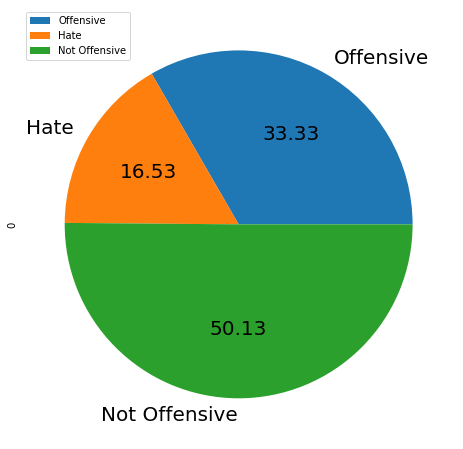

In [40]:
labels_count.plot.pie(
    labels=["Offensive","Hate","Not Offensive"],
    subplots="True", autopct='%.2f',    
    figsize=(8,8), fontsize=(20))

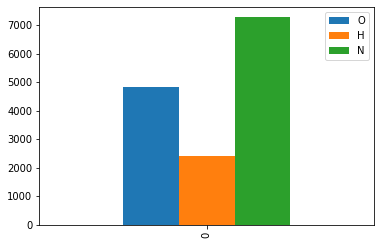

In [49]:
labels_count.transpose().plot.bar()

# 4 - Exemplo de filtragem de dados

In [42]:
hate_data = data.loc[data.labels == "H"]

In [43]:
hate_data

,tweet_text,confidence,labels,length
1,Fuck dykes,0.7227,H,10
2,@sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandonernandez @bootyacid at least i dont look like jefree starr faggot,0.5229,H,111
3,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkillah Is a fag"" jackie jealous"" Neeeee",0.5184,H,81
5,"@elaynay your a dirty terrorist and your religion is a fucking joke, you go around screaming Allah akbar doing terrorist shit. Dirty faggot.",0.8816,H,140
6,RT @ivanrabago_: @_WhitePonyJr_ looking like faggots?,0.5207,H,53
...,...,...,...,...
14452,@PoliticsPeach @ArmAndProtect @AbolishWelfare @NIX1331_ @Likaveli The coon preachers that met w Trump also still have followers. Travesty _Ì«ÌÐå©,0.6718,H,145
14466,@Huscoon Coon~,0.6598,H,14
14468,@AS_Waffloid *u dam coon,0.6717,H,24
14483,Ben Carson thinks it's okay to have A confederate flag hanging on your property this nigglet is the biggest coon ever lol where his mother?,0.6684,H,139


Fazer correlação da confidência e a quantidade de caracteres

In [44]:
graph = dict(zip(hate_data['confidence'], hate_data.length))
graph = pd.DataFrame.from_dict(graph, orient='index')

In [45]:
graph.sort_index()

,0
0.3365,50
0.3367,37
0.3368,72
0.3382,94
0.3383,58
...,...
0.8435,23
0.8816,140
0.8826,105
0.9221,57


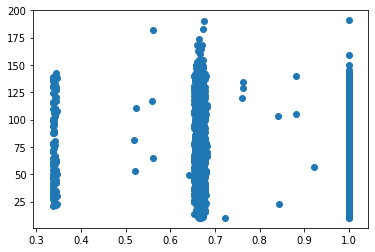

In [46]:
import matplotlib.pyplot as plt
plt.scatter(hate_data['confidence'], hate_data.length)

# 4 - Salvar dados

In [47]:
data.to_csv('./arquivos/data.csv', encoding='ISO-8859-1', index=False)